In [6]:
import numpy as np
import pandas as pd
import numpy.random as random
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts

In [7]:
def mul_ten_and_mat(tensor, matrix):
    ten_shape = tensor.shape
    result = np.zeros((ten_shape[0], ten_shape[2]))
    for i in range(ten_shape[2]):
        result[:,i] = tensor[:,:,i].dot(matrix[:,i])
    return result

N = 2000
A = np.array([
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ],
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ],
    [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ]
    ])


tmp = np.array(
    [
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    ])

data_tensor = np.zeros((N + 200, 3, 3))
data_tensor[0] = tmp
for i in range(1, N + 200):
    tmp = mul_ten_and_mat(A, data_tensor[i-1])
    data_tensor[i] = tmp + random.uniform(-1, 1, (3, 3))
data_tensor = data_tensor[:N, :, :]
data_tensor.shape

(2000, 3, 3)

In [8]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.823359,0.934750,0.616777,-0.284090,1.345791,1.166045,-0.116963,1.225063,-0.348453
2,0.177006,0.979616,0.446107,1.854794,1.193041,1.969675,0.150322,-0.385354,0.408575
3,0.548234,-0.132458,0.919807,0.669468,1.594320,1.291473,-0.472331,-0.266174,0.453402
4,0.599339,1.135630,0.890995,2.416618,2.487426,1.348371,1.197866,0.023184,-0.420557
...,...,...,...,...,...,...,...,...,...
1995,2.864676,1.708414,2.403716,-3.507393,-4.052750,-3.989684,10.012901,9.834587,10.275816
1996,3.701130,2.691060,2.090022,-4.459216,-4.882393,-3.295464,11.238968,9.316937,10.712933
1997,3.261178,3.719083,4.433231,-4.339540,-4.598864,-4.762875,10.848834,9.817992,11.155193
1998,2.560334,3.827322,2.360882,-4.780959,-4.513614,-3.669869,10.305619,10.636794,11.003406


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

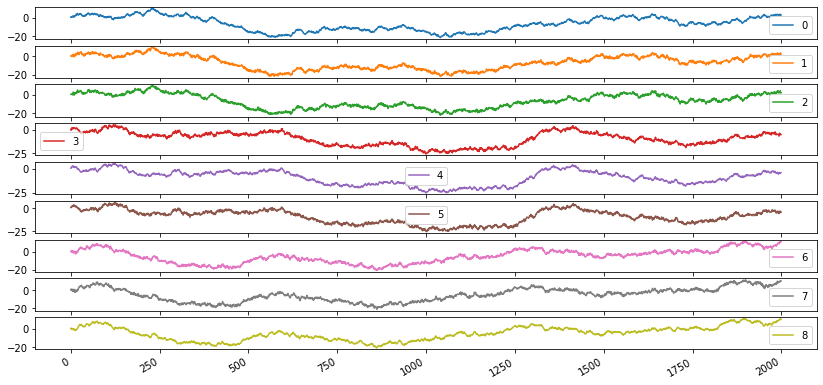

In [9]:
vectorized.plot(figsize = (14, 7), subplots = True)